In [1]:
# Imports & readDataSubset()
import pandas as pd
import numpy as np
import pyarrow.dataset as pads
from SMT_Data_Starter_2025 import readDataSubset
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns

# # Load fonts
# font_path = r"C:\Users\mla21\AppData\Local\Microsoft\Windows\Fonts\Helvetica.ttf"
# fm.fontManager.addfont(font_path)
# plt.rcParams['font.family'] = 'Helvetica'

# Just get the subsets out of the way
game_info_subset = readDataSubset('game_info')
game_events_subset = readDataSubset('game_events')
player_position_subset = readDataSubset('player_pos')
ball_position_subset = readDataSubset('ball_pos')

In [2]:
# Load CSV's
analysis = pd.read_csv('../CSV/analysis.csv')
wouldbe = pd.read_csv('../CSV/wouldbe.csv')

In [3]:
analysis.head(1)

,game_str,play_id,batter,hand,mean_hustle_plus,mean_effort,pr_safe_baseline,stretch_by_1st_saved_ms,pr_safe_wouldbe_mean,pr_safe_wouldbe_max,...,nth_throw,safe,advanced,time_lost,spd_sm_mapsoft_theta,acc_5to10_95th,wouldbe_ft_til_1st_itsx_ifmax,wouldbe_ft_til_1st_itsx_ifmed,wouldbe_ft_til_1st_catch_ifmax,wouldbe_ft_til_1st_catch_ifmed
0,y1_d001_CGA_QEA,21.0,CGA-1824,R,136.484299,97.409049,0.99818,15.149842,0.724288,0.999985,...,2,True,False,0.0,29.039858,23.519888,-4.404517,2.110627,-4.961859,1.588369


In [4]:
wouldbe.head(2)

,game_str,play_id,timestamp,startrun_ts,time_lost,spd_sm_mapsoft_theta,acc_5to10_95th,ft_til_1st_sm,spd_to_1st_sm,shouldstartrun_ts,E_itsx_ts,E_catch_ts,wouldbe_ft_til_1st_itsx_ifmax,wouldbe_ft_til_1st_itsx_ifmed,wouldbe_ft_til_1st_catch_ifmax,wouldbe_ft_til_1st_catch_ifmed,wouldbe_ft_til_1st_itsx_ifmean,wouldbe_ft_til_1st_catch_ifmean
0,y1_d001_CGA_QEA,21.0,560749,560749.0,0.0,29.039858,23.519888,91.276741,5.896027,560749.0,5.645998e+05,5.646814e+05,-4.404517,2.110627,-4.961859,1.588369,4.927117,4.492168
1,y1_d001_CGA_QEA,138.0,5241255,5241255.0,0.0,28.558183,22.186154,87.722112,2.533099,5241255.0,5.244105e+06,5.244261e+06,29.330748,33.772452,25.210217,30.013977,35.489567,31.916538


(array([ 15.,  35.,  84., 135., 205., 262., 383., 576., 645., 480.]),
 array([  0.68197077,  10.61377369,  20.54557661,  30.47737954,
         40.40918246,  50.34098538,  60.27278831,  70.20459123,
         80.13639415,  90.06819708, 100.        ]),
 <BarContainer object of 10 artists>)

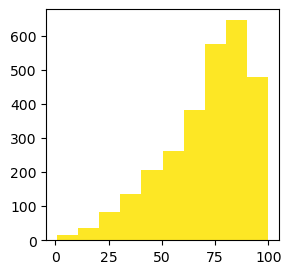

In [5]:
# Make sure to use viridis color scheme
# Like the paper
cmap = plt.get_cmap('viridis')
NUM_COLORS = 3  # Chance this to get more/less colors
colors = [cmap(i) for i in np.linspace(0,1,NUM_COLORS)]
# Example usage
plt.figure(figsize=(3,3))
plt.hist(analysis['mean_effort'], color=colors[2])

In [247]:
# Top/Bottom 10 (or 5?) Hustle+
# Make sure to color code well
player_counts = analysis['batter'].value_counts()

players_5_or_more = player_counts[player_counts >= 5]

filtered_df = analysis[analysis['batter'].isin(players_5_or_more.index)].copy()
filtered_df['safe_prob_added_med'] = filtered_df['pr_safe_baseline'] - filtered_df['pr_safe_wouldbe_med']
filtered_df['Team'] = filtered_df['batter'].str[:3]

team_hustle = filtered_df.groupby('Team')['mean_hustle_plus'].mean().reset_index()
team_safe = filtered_df.groupby('Team')['pr_safe_wouldbe_med'].mean().reset_index()
team_effort = filtered_df.groupby('Team')['mean_effort'].mean().reset_index()

# team_merged = pd.merge(
#     team_hustle,
#     team_safe[['Team', 'pr_safe_wouldbe_med']], 
#     on='Team',
#     how='left'
# )

team_merged = pd.merge(
    team_merged,
    team_effort[['Team', 'mean_effort']], 
    on='Team',
    how='left'
)


   Team  count
0   ACN      5
1   APZ      5
2   CGA      5
3   DYE     80
4   FBP     18
5   GAX      5
6   GEA      5
7   GIS      5
8   HKR      5
9   HMN      5
10  IAK      5
11  IAQ      7
12  IXC     10
13  JMJ      6
14  KJH      5
15  KNB     17
16  LFS     12
17  MGJ      5
18  MRJ     14
19  NYA      5
20  OXG     19
21  PVJ     11
22  QEA    217
23  QZE      5
24  RZQ    667
25  STK      6
26  TEQ      5
27  UPU     12
28  UWE      5
29  WJU      5
30  WNA      5
31  WZR      5
32  YJD    487


In [245]:
avg_hustle = filtered_df.groupby('batter')['mean_hustle_plus'].mean().reset_index()
avg_effort = filtered_df.groupby('batter')['mean_effort'].mean().reset_index()


avg_hustle = avg_hustle.sort_values('mean_hustle_plus', ascending=False)
avg_hustle = avg_hustle.dropna(subset=['mean_hustle_plus'])

avg_hustle_rev = avg_hustle.sort_values('mean_hustle_plus', ascending=True)

avg_safe = filtered_df.groupby('batter')['safe_prob_added_med'].mean().reset_index()
avg_safe.rename(columns={'safe_prob_added_med': 'avg_safe_prob'}, inplace=True)

player_stats = avg_hustle.merge(avg_safe, on='batter')
player_stats = player_stats.merge(avg_effort, on='batter')
final = avg_hustle.merge(avg_effort, on='batter')

       batter  mean_hustle_plus  mean_effort
0    MGJ-2320        125.150860    89.320356
1    OXG-0018        123.722371    88.300842
2    YJD-0397        122.014246    87.081751
3    DYE-0331        121.374660    86.625277
4    UWE-1368        118.379464    84.487601
..        ...               ...          ...
122  FBP-1225         71.912595    51.324127
123  GIS-2131         70.214645    50.112298
124  WZR-2401         69.478519    49.586923
125  RZQ-0038         65.653715    46.857155
126  LFS-1887         50.511472    36.050113

[127 rows x 3 columns]


In [255]:
from great_tables import GT, md, html
from great_tables.data import islands

Players_hustle_best = final.head(5)
Players_hustle_best = Players_hustle_best.round(1)


(
    GT(Players_hustle_best, rowname_col = "batter")
    .tab_header(
        title="Highest Average Hustle+ by Player",
        subtitle="Players with ≥ 5 plays"
    )
    .tab_stubhead(label="Player ID")
)

Players_hustle_worst = avg_hustle_rev.head(5)
Players_hustle_worst = Players_hustle_worst.round(1)
Players_hustle_best.rename(columns={'mean_hustle_plus': 'Hustle+'}, inplace=True)
Players_hustle_best.rename(columns={'mean_effort': 'Effort%'}, inplace=True)
Players_hustle_worst = final.sort_values('mean_hustle_plus', ascending=True)
Players_hustle_worst = Players_hustle_worst.head(5)
Players_hustle_worst = Players_hustle_worst.round(1)
Players_hustle_worst.rename(columns={'mean_hustle_plus': 'Hustle+'}, inplace=True)
Players_hustle_worst.rename(columns={'mean_effort': 'Effort%'}, inplace=True)


from great_tables import style, loc

table = (
    GT(Players_hustle_worst, rowname_col="batter")
    .tab_header(
        title="Bottom 5 Hustle+",
        subtitle="Min. 5 contests at 1st base"
    )
    .tab_stubhead(label="Player ID")
    .fmt_number(columns="Hustle+", decimals=1)
    .opt_row_striping()
    .opt_table_font("Helvetica")
    .tab_options(table_font_size="13px", data_row_padding="6px")
)
table = (
    table
    .tab_style(style=style.text(align="center"), locations=loc.body())
    .tab_style(style=style.text(align="center"), locations=loc.column_labels())
    .tab_style(style=style.text(align="center"), locations=loc.stub())
)
table = (
    table
    .opt_table_outline(color="#333333", width="1px")
    .tab_options(
        column_labels_border_top_color="#333333",
        column_labels_border_bottom_color="#333333",
        column_labels_border_top_width="1px",
        column_labels_border_bottom_width="1px"
    )
)
table = table.tab_style(
    style=style.borders(sides="top", color="transparent", weight="0px"),
    locations=loc.body())


table

# team_final = team_merged.sort_values('mean_hustle_plus', ascending=True)
# team_final.rename(columns={'mean_hustle_plus': 'Hustle+'}, inplace=True)
# team_final.rename(columns={'mean_effort': 'Effort%'}, inplace=True)
# team_final = team_final.round(1)

# team_final = team_final.head(5)

# table = (
#     GT(team_final, rowname_col="Team")
#     .tab_header(
#         title="Bottom 5 Team Hustle+",
#     )
#     .tab_stubhead(label="Team")
#     .fmt_number(columns="Hustle+", decimals=1)
#     .opt_row_striping()  # subtle alternating rows
#     .opt_table_font("Helvetica")
#     .tab_options(table_font_size="13px", data_row_padding="6px")
# )
# table = (
#     table
#     .tab_style(style=style.text(align="center"), locations=loc.body())
#     .tab_style(style=style.text(align="center"), locations=loc.column_labels())
#     .tab_style(style=style.text(align="center"), locations=loc.stub())
# )
# table = (
#     table
#     .opt_table_outline(color="#333333", width="1px")
#     .tab_options(
#         column_labels_border_top_color="#333333",
#         column_labels_border_bottom_color="#333333",
#         column_labels_border_top_width="1px",
#         column_labels_border_bottom_width="1px"
#     )
# )
# table = table.tab_style(
#     style=style.borders(sides="top", color="transparent", weight="0px"),
#     locations=loc.body())

# table

GT(_tbl_data=  Team  Hustle+  Effort%
1  QEA     87.0     62.1
2  RZQ     95.7     68.3
0  DYE     99.6     71.1
3  YJD    101.5     72.5, _body=<great_tables._gt_data.Body object at 0x15f1258e0>, _boxhead=Boxhead([ColInfo(var='Team', type=<ColInfoTypeEnum.stub: 2>, column_label='Team', column_align='left', column_width=None), ColInfo(var='Hustle+', type=<ColInfoTypeEnum.default: 1>, column_label='Hustle+', column_align='right', column_width=None), ColInfo(var='Effort%', type=<ColInfoTypeEnum.default: 1>, column_label='Effort%', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15f125070>, _spanners=Spanners([]), _heading=Heading(title='Bottom 5 Team Hustle+', subtitle=None, preheader=None), _stubhead='Team', _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Hustle+', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Hustle+', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Hustle+', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Hustle+', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Effort%', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Effort%', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Effort%', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Effort%', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocColumnLabels(columns=None), grpname=None, colname='Hustle+', rownum=None, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocColumnLabels(columns=None), grpname=None, colname='Effort%', rownum=None, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleI